IMPORTANT LIBERARIES

In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

DATA_SET 

In [5]:
train_df = pd.read_csv("Emotion_dataset/training.csv")

UNDERSTANDING THE DATASET AND TRYING TO GET TO KNOW THE DATA AND TRYING TO UNDERSTAND THE DATA BY SOME METHOD

In [6]:
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


UNIQUE VALUES IN THE DATA_SET TO FIND HOW MANY EMOTION IS UESED IN THIS CASE THER ARE THE TOTAL OF 5 UNIQUE NUMBERS SO THERE ARE 5 EMOTION ARE USED IN THIS DATA_SET

In [7]:
train_df['label'].unique()

array([0, 3, 2, 5, 4, 1])

SO AFTER KNOWING THE UNIQUE IN THE LABEL NOW WE NEED TO FIND THE THE MEANING BEHIND THE LABEL NUMBERS FOR EXAMPLE THE NUMBER 0 IN THE LABEL FEATURE OR TARGET FEATURE REPRESENT A KIND OF EMOTION BUT WE DID'T KNOW THAT BUT WE CAN GET BY GETTING SOME IDEAS FROM THE TEXT FEATURES.

In [8]:
import random

# Get 5 random sentences per label
samples_per_label = 5
label_samples = {}

for label in range(1, 6):  # Assuming labels are 1-5
    sentences = train_df[train_df['label'] == label]['text'].tolist()
    label_samples[label] = random.sample(sentences, min(samples_per_label, len(sentences)))

# Display sampled sentences
for label, samples in label_samples.items():
    print(f"Label {label} samples:")
    for sentence in samples:
        print(f"- {sentence}")
    print("\n")

Label 1 samples:
- i have to go straight out after work and need to feel instantly glamorous i will usually wear a pair of our nw skinnies with a pair of high high shoes
- i did not sleep better my food did not taste better my thoughts were not clearer i did not feel more vigorous i was in essence pounds of body and mind almost exclusively devoted to thinking about the cigarette i wanted but could not have
- i spend all day in bed or when im feeling adventurous on the couch because when i get up my leg hurts worse than my aching heart after titanic
- i was like that too before i really heck care about having nice feeds and post whatever photos i feel like they only comment on cool peoples photos
- i feel like this project will actually help me pick a valuable car that is decent looking as well as efficient to my everyday use


Label 2 samples:
- i hope someday when i am again in a position to give that i will remember how it feels and be sympathetic and sensitive to others
- i felt god

TEXT PREPROCESSING:

HERE WE CONVERT THE TEXT TO TO LOWER CASE THEN REMOVE THE PUNCTUATION AND SPECIAL CHARACTER AND CONSIDER STEMMING OR LEMMATIZATION TO NORMALISZE WORDS THEN WE REMOVE THE STOP WORDS AND KEEP THOSE WHICH IS IMPORTANT FOR EMOTION DETECTION

In [9]:
# Initialize NLTK's WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Custom stopwords list (modify as needed)
stop_words = set(stopwords.words('english'))
keep_words = {
    'not', 'no', 'very', 'too', 'but', 'and', 'or', 'so', 'yet',
    'still', 'though', 'just', 'even', 'although', 'despite', 'unless'
}
stop_words = stop_words - keep_words

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs, mentions, and special characters
    text = re.sub(r'http\S+|www\S+|@\w+|[^\w\s]', '', text)
    
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 4. Tokenize
    tokens = nltk.word_tokenize(text)
    
    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # 6. Lemmatization (using NLTK's WordNetLemmatizer)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(lemmatized)

# Apply preprocessing to the 'text' column of train_df
train_df['text'] = train_df['text'].apply(preprocess_text)

In [10]:
train_df.head()

,text,label
0,didnt feel humiliated,0
1,go feeling so hopeless so damned hopeful just ...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3


FEATURE EXTRACTION:

THERE ARE MANY METHODS FOR FEATURE EXTRACTION, BUT IN THIS PROJECT, WE WILL FOCUS ON THREE

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt

# Split data
X = train_df['text']
y = train_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Bag of Words (BoW): 

A method to convert text into a vector based on word frequency.

In [13]:
#########################################################
# 1. Bag of Words / CountVectorizer
#########################################################
print("\n1. Bag of Words / CountVectorizer")

# Copy for BOW
bow_df = train_df.copy()

count_vectorizer = CountVectorizer(max_features=1000)
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

bow_feature_names = count_vectorizer.get_feature_names_out()
train_bow_df = pd.DataFrame(X_train_bow.toarray(), columns=bow_feature_names)
train_bow_df['label'] = y_train.values

test_bow_df = pd.DataFrame(X_test_bow.toarray(), columns=bow_feature_names)
test_bow_df['label'] = y_test.values

print("BOW Transformation Shape:", X_train_bow.shape)



1. Bag of Words / CountVectorizer
BOW Transformation Shape: (12800, 1000)


TF-IDF: 

A technique that assigns weights to words based on their relevance.

In [14]:
#########################################################
# 2. TF-IDF Vectorizer
#########################################################
print("\n2. TF-IDF Vectorizer")

# Copy for TF-IDF
tfidf_df = train_df.copy()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_feature_names)
train_tfidf_df['label'] = y_train.values

test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_feature_names)
test_tfidf_df['label'] = y_test.values

print("TF-IDF Transformation Shape:", X_train_tfidf.shape)


2. TF-IDF Vectorizer
TF-IDF Transformation Shape: (12800, 1000)


Pretrained Language Models (BERT): 

A deep learning model used to capture contextual meaning in text.

In [15]:
#########################################################
# 3. Pre-trained Language Models (BERT)
#########################################################
print("\n3. Pre-trained Language Models (BERT)")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.to(device)

def get_bert_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    sentence_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return sentence_embedding[0]

# Get BERT embeddings for the full train_df
bert_vectors = []

for text in train_df['text']:
    bert_vectors.append(get_bert_embedding(text, tokenizer, model))

bert_vectors = np.array(bert_vectors)

# Create BERT DataFrame
bert_features_df = pd.DataFrame(bert_vectors, columns=[f'bert_{i}' for i in range(bert_vectors.shape[1])])
bert_features_df['label'] = train_df['label'].values

print("BERT Transformation Shape:", bert_features_df.shape)


3. Pre-trained Language Models (BERT)
BERT Transformation Shape: (16000, 769)


COMPARING ALL THREE METHODS:

In [19]:
bert_features_df.head()

,bert_0,bert_1,bert_2,bert_3,bert_4,bert_5,bert_6,bert_7,bert_8,bert_9,...,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767,label
0,-0.378248,0.463979,-0.239258,0.163592,-0.534104,-0.302850,0.503549,0.332513,0.225826,-0.221141,...,-0.235082,0.592954,0.034664,-0.357210,0.099080,-0.643126,-0.652154,0.585311,0.257307,0
1,-0.081902,-0.013504,-0.223530,-0.109440,-0.535047,-0.201180,0.149587,0.437907,-0.056229,-0.341022,...,-0.656898,0.096679,-0.084297,0.337633,0.412830,-0.423913,-0.671552,0.267394,0.280089,0
2,0.035976,0.424648,0.154659,-0.149515,-0.181266,-0.264295,0.308250,0.166854,0.189537,-0.317166,...,-0.251943,0.045781,0.053440,0.027152,0.108028,-0.071398,-0.515738,0.355519,0.232606,3
3,-0.405880,-0.006896,0.122234,-0.276819,-0.328255,-0.182529,0.365919,0.408862,-0.157338,-0.447405,...,-0.182431,0.103709,0.168277,0.239386,-0.188204,0.028110,-0.304267,0.193343,0.170983,2
4,-0.233594,0.166838,-0.166461,-0.062601,-0.447343,-0.335622,0.165123,0.450396,-0.052865,-0.432139,...,-0.242205,0.027121,-0.019943,0.164283,-0.036892,-0.149714,-0.287563,0.190996,0.013374,3


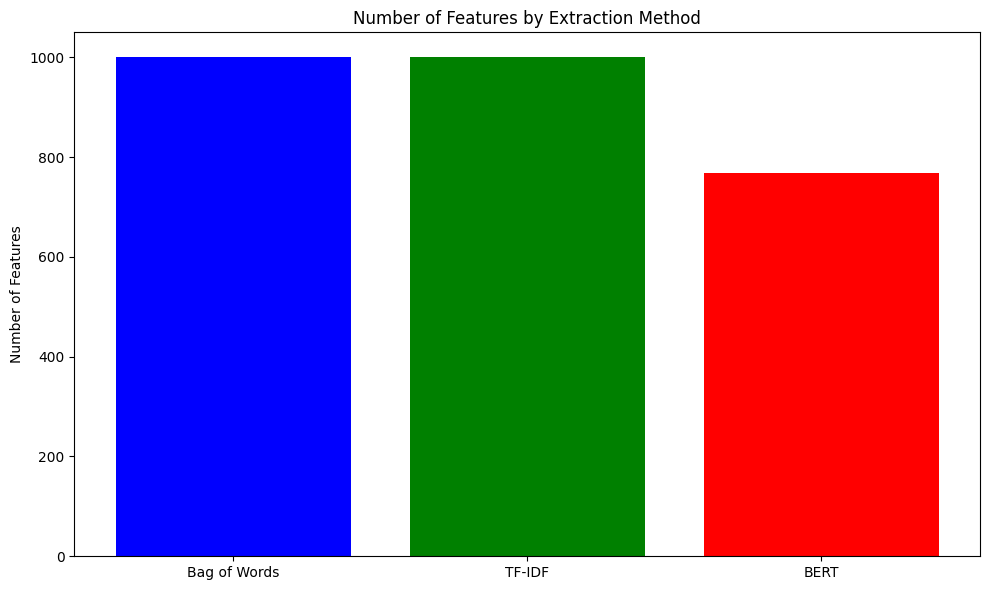


Feature Count Comparison:
Bag of Words: 1000 features
TF-IDF: 1000 features
BERT: 768 features


In [17]:
#########################################################
# Visualization for Comparison
#########################################################
feature_counts = {
    'Bag of Words': len(bow_feature_names),
    'TF-IDF': len(tfidf_feature_names),
    'BERT': bert_vectors.shape[1]
}

plt.figure(figsize=(10, 6))
plt.bar(feature_counts.keys(), feature_counts.values(), color=['blue', 'green', 'red'])
plt.title('Number of Features by Extraction Method')
plt.ylabel('Number of Features')
plt.tight_layout()
plt.show()

print("\nFeature Count Comparison:")
for method, count in feature_counts.items():
    print(f"{method}: {count} features")

Splitting Your Dataset

In [ ]:
from sklearn.model_selection import train_test_split

